# Summary statistics on circular variables

Test examples.

Some theory explanation: 
https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2017WR021731

In [1]:
%matplotlib inline

import sys
import pickle
import warnings
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.stats import circmean
from scipy.stats import linregress

sys.path.append('/g/data/os22/chad_tmp/Aus_phenology/src')
from phenology_pixel import mk_with_slopes

Dask configuration key 'ucx' has been deprecated; please use 'distributed.comm.ucx' instead
Dask configuration key 'distributed.scheduler.transition-log-length' has been deprecated; please use 'distributed.admin.low-level-log-length' instead
Dask configuration key 'distributed.comm.recent-messages-log-length' has been deprecated; please use 'distributed.admin.low-level-log-length' instead


## Open data

In [2]:
#NDVI timeseries processed earlier to daily
timeseries_file = '/g/data/os22/chad_tmp/Aus_phenology/data/pickle/IBRA_subregions_NDVI_AusENDVI-clim_MCD43A4.pkl'
with open(timeseries_file, 'rb') as f:
    results = pickle.load(f)

# phenology calculted earlier
phenometrics_file = '/g/data/os22/chad_tmp/Aus_phenology/data/pickle/IBRA_subregions_AusENDVI-clim_MCD43A4_phenometrics_new.pkl'
with open(phenometrics_file, 'rb') as f:
    eco_regions_phenometrics = pickle.load(f)

#ibra subregions
ecoregions_file = '/g/data/os22/chad_tmp/Aus_phenology/data/vectors/IBRAv7_subregions_modified.geojson'
gdf = gpd.read_file(ecoregions_file)

## Interactively plot IBRA regions

Hover over the regions to see its name

In [3]:
# gdf.explore(column='SUB_NAME_7',
#             tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
#             attr = 'Esri',
#             name = 'Esri Satellite',
#             control = True,
#             legend=False
#            )

## Slopes and mean on a time series of circular variables


#### First, lets plot a region where the time-series is straightforward and the 'day-of-year' never crosses the calendar boundary.

In [4]:
k = 'Geraldton Hills rainfed crop' 
var='SOS'

In [5]:
df = eco_regions_phenometrics[k]

data = pd.DataFrame({
    "year": df[f'{var}_year'].values,
    "day_of_year": df[var].values
})

# Number of days in a year (adjusting for leap years if needed)
data['days_in_year'] = data['year'].apply(lambda y: 366 if y % 4 == 0 and (y % 100 != 0 or y % 400 == 0) else 365)

# Convert day-of-year to circular coordinates doy / 365 * 2 * np.pi
data['theta'] = data['day_of_year']*((2*np.pi)/data['days_in_year'])
# Unwrap Angular Data: Use np.unwrap to handle angular continuity
# for both wraparound and non-wraparound cases.
data['theta_unwrap'] = np.unwrap(data['theta'])

# Calculate circular mean
circular_mean = circmean(data['theta'])
circular_mean_doy = circular_mean / (2 * np.pi) * 365
print(f"Circular mean {var} DOY: {circular_mean_doy}")
print(f"Linear mean {var} DOY: {df[var].mean()}")
print('\n')

# p_value, slope, intercept = mk_with_slopes(data['theta'])
p_value, slope, intercept = mk_with_slopes(data['theta_unwrap'])
p_value_alt, slope_alt, intercept_alt = mk_with_slopes(data['theta_unwrap'])
slope_doy = slope * 365 / (2 * np.pi)

print(f"{var} circular slope magnitude: {slope:.4f}")
print(f"{var} circular slope magnitude converted to DOY units: {slope_doy:.4f}")

print(f"{var} linear slope magnitude: {mk_with_slopes(df[var]).slope}")
print('\n')
print(f"{var} circular p-value: {p_value:.4f}")
print(f"{var} linear p-value: {mk_with_slopes(df[var]).p:.4f}")

Circular mean SOS DOY: 137.79080424137751
Linear mean SOS DOY: 137.94871520996094


SOS circular slope magnitude: 0.0086
SOS circular slope magnitude converted to DOY units: 0.5000
SOS linear slope magnitude: 0.5


SOS circular p-value: 0.0303
SOS linear p-value: 0.0312


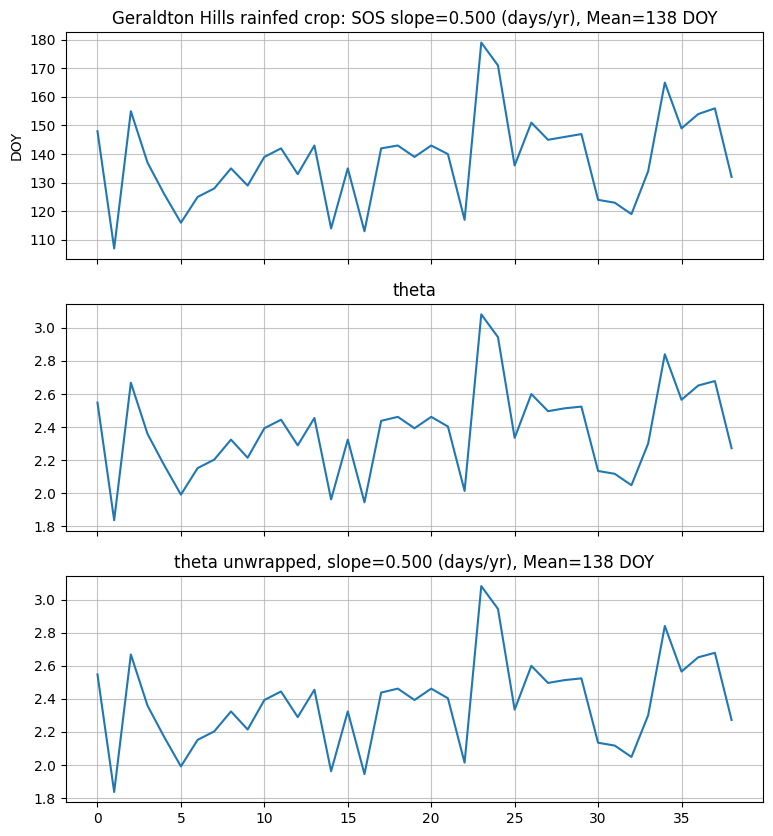

In [6]:
fig,ax=plt.subplots(3,1, figsize=(9,10), sharex=True)

df[var].plot(ax=ax[0])
data['theta'].plot(ax=ax[1],label='theta')
data['theta_unwrap'].plot(ax=ax[2],label=f'x, slope={slope:.4f}')
ax[0].grid(alpha=0.75)
ax[1].grid(alpha=0.75)
ax[2].grid(alpha=0.75)
ax[0].set_ylabel('DOY')
ax[0].set_title(f'{k}: {var} slope={mk_with_slopes(df[var]).slope:.3f} (days/yr), Mean={df[var].mean():.0f} DOY')
ax[1].set_title('theta')
ax[2].set_title(f'theta unwrapped, slope={slope_doy:.3f} (days/yr), Mean={circular_mean_doy:.0f} DOY');

#### Now let's pick and example where the SOS crosses over the calender year boundary

In [7]:
k = 'Victorian Alps'
var='SOS'

In [8]:
df = eco_regions_phenometrics[k]

data = pd.DataFrame({
    "year": df[f'{var}_year'].values,
    "day_of_year": df[var].values
})

# Number of days in a year (adjusting for leap years if needed)
data['days_in_year'] = data['year'].apply(lambda y: 366 if y % 4 == 0 and (y % 100 != 0 or y % 400 == 0) else 365)

# Convert day-of-year to circular coordinates doy / 365 * 2 * np.pi
data['theta'] = data['day_of_year']*((2*np.pi)/data['days_in_year'])
# Unwrap Angular Data: Use np.unwrap to handle angular continuity
# for both wraparound and non-wraparound cases.
data['theta_unwrap'] = np.unwrap(data['theta'])

# Calculate circular mean
circular_mean = circmean(data['theta'])
circular_mean_doy = circular_mean / (2 * np.pi) * 365
print(f"Circular mean {var} DOY: {circular_mean_doy}")
print(f"Linear mean {var} DOY: {df[var].mean()}")
print('\n')

# p_value, slope, intercept = mk_with_slopes(data['theta'])
p_value, slope, intercept = mk_with_slopes(data['theta_unwrap'])
p_value_alt, slope_alt, intercept_alt = mk_with_slopes(data['theta_unwrap'])
slope_doy = slope * 365 / (2 * np.pi)

print(f"{var} circular slope magnitude: {slope:.4f}")
print(f"{var} circular slope magnitude converted to DOY units: {slope_doy:.4f}")

print(f"{var} linear slope magnitude: {mk_with_slopes(df[var]).slope}")
print('\n')
print(f"{var} circular p-value: {p_value:.4f}")
print(f"{var} linear p-value: {mk_with_slopes(df[var]).p:.4f}")

Circular mean SOS DOY: 39.48615454325322
Linear mean SOS DOY: 94.74359130859375


SOS circular slope magnitude: -0.0183
SOS circular slope magnitude converted to DOY units: -1.0610
SOS linear slope magnitude: 0.09090909090909091


SOS circular p-value: 0.0343
SOS linear p-value: 0.8464


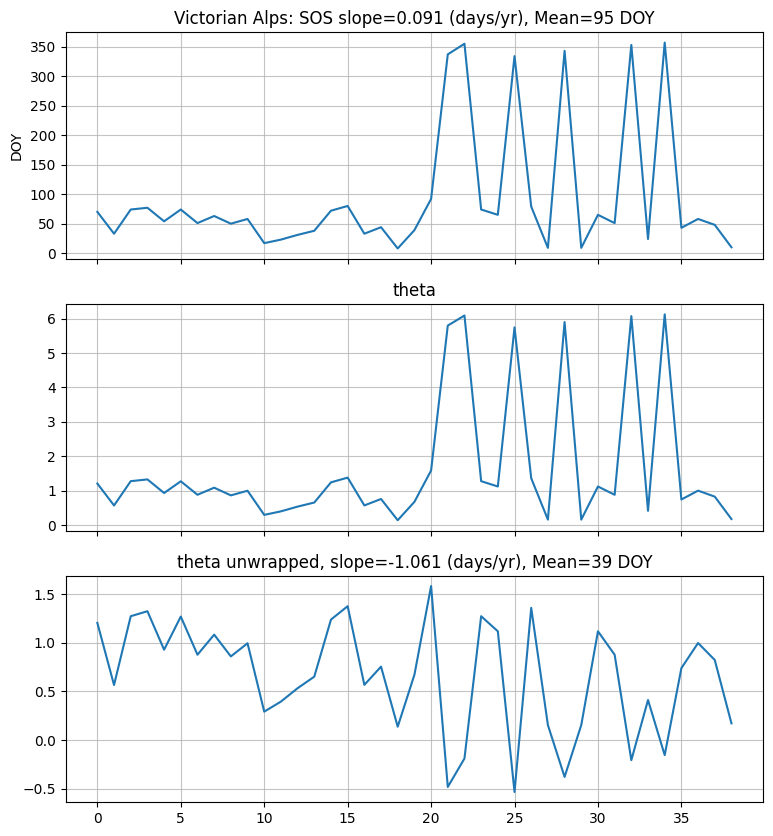

In [9]:
fig,ax=plt.subplots(3,1, figsize=(9,10), sharex=True)

df[var].plot(ax=ax[0])
data['theta'].plot(ax=ax[1],label='theta')
data['theta_unwrap'].plot(ax=ax[2],label=f'x, slope={slope:.4f}')
ax[0].grid(alpha=0.75)
ax[1].grid(alpha=0.75)
ax[2].grid(alpha=0.75)
ax[0].set_ylabel('DOY')
ax[0].set_title(f'{k}: {var} slope={mk_with_slopes(df[var]).slope:.3f} (days/yr), Mean={df[var].mean():.0f} DOY')
ax[1].set_title('theta')
ax[2].set_title(f'theta unwrapped, slope={slope_doy:.3f} (days/yr), Mean={circular_mean_doy:.0f} DOY');